# A2 Exploratory Data Analysis: World Happiness Report: 2015-2019

## Dataset: Word Happiness Report Data (2015-2019)

The dataset used here can be downloaded from Kaggle: https://www.kaggle.com/unsdsn/world-happiness/download. 
Detailed description can be found at: https://www.kaggle.com/unsdsn/world-happiness. 
The dataset is downloaded and saved in the same folder as this notebook. 
The dataset contains the happiness score and the scores of six key factors for ~156 countries during 2015-2019. 
Concepts associated with the dataset, like Dystopian residuals (basically introduces an illusional 'Dystopia' country which has the lowest scores in every key factors, in order to bring scores of all real countries to a positive, comparable range) can be found in the above link too.

In [593]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch

In [2]:
# Load data
whr15 = pd.read_csv('World Happiness Report - Kaggle/2015.csv')
whr16 = pd.read_csv('World Happiness Report - Kaggle/2016.csv')
whr17 = pd.read_csv('World Happiness Report - Kaggle/2017.csv')
whr18 = pd.read_csv('World Happiness Report - Kaggle/2018.csv')
whr19 = pd.read_csv('World Happiness Report - Kaggle/2019.csv')
# Use same column names for score, rank, and factors
whr15 = whr15[['Happiness Rank','Country','Happiness Score','Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Region']]
whr15.columns = ['Rank','Country','Score','Economy','Support', 'Health', 'Freedom', 'Corruption', 'Generosity', 'Dystopia Residual',   'Region']
whr16 = whr16[['Happiness Rank','Country','Happiness Score','Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity',  'Dystopia Residual', 'Region']]
whr16.columns = ['Rank','Country','Score','Economy','Support', 'Health', 'Freedom', 'Corruption', 'Generosity', 'Dystopia Residual', 'Region']
whr17 = whr17[['Happiness.Rank','Country','Happiness.Score','Economy..GDP.per.Capita.','Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity']]
whr17.columns = ['Rank','Country','Score','Economy','Support', 'Health', 'Freedom', 'Corruption', 'Generosity']
whr18 = whr18[['Overall rank','Country or region','Score','GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
whr18.columns = ['Rank','Country','Score','Economy','Support', 'Health', 'Freedom', 'Corruption', 'Generosity']
whr19 = whr19[['Overall rank','Country or region','Score','GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
whr19.columns = ['Rank','Country','Score','Economy','Support', 'Health', 'Freedom', 'Corruption', 'Generosity']

The formats of data varies from year to year. Before analyzing the data, use a consistent format for each year's dataset. 
Merge 2015-2019 dataset into a single csv file (sorted.csv). Rename the name of columns so that it's concise (easy to put in plots).
First sort each year's data by the name of country, compare across different years, noticed that there are some countries only show up in certain years.
Add empty rows to those years that are missing these countries to make all countries show in the same rows across the five years.
Then, calculate the mean, minimum, and maximum of the overall score from the five years, and sort the whole dataset by averaged overall score.
So that we got a sorted.csv file that has all the information, sorted from the happiest country during 2015-2019 to the least happy country.

In [3]:
# Load sorted dataset
score = pd.read_csv('World Happiness Report - Kaggle/sorted.csv')

## Analysis Questions
### What factors drive the overall happiness of a country?

Specific Questions:

1. What is the overall happiest country during 2015-2019?
2. Among the six key factors, which factor contributes the most to the overall happiness score?
3. Case study: How does the happiness score of US and China change over time and what facors are driving these changes? 
4. Are any of the key factors correlated?

## 1. What is the overall happiest country during 2015-2019?

Focus on the overall happiness score and the rank first. Which are the 10 happiest countries and the 10 least happy countries? Any changes in rank from 2015 to 2019?

In [5]:
def Rank(whr, Country):
    r =  whr.loc[whr['Country'] == Country]['Rank']
    if r.empty:
        r = np.nan
    else:
        r = int(r)
    return r

def getRank(Country):
    r15 = Rank(whr15,Country)
    r16 =  Rank(whr16,Country)
    r17 =  Rank(whr17,Country)
    r18 =  Rank(whr18,Country)
    r19 =  Rank(whr19,Country)
    return [r15, r16, r17, r18, r19]

Text(0.5,1,'2015-2019 World Happiness Rank: Top 10')

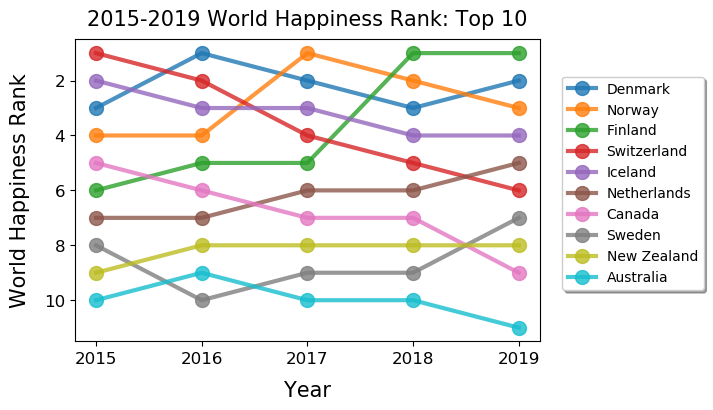

In [214]:
plt.figure(figsize=(6,4), dpi=100)
for c in list(score.head(10)['Country']):
    plt.plot(['2015','2016','2017','2018','2019'], getRank(c), label = c, linestyle='-', marker='o', markersize=10, linewidth=3, alpha=0.8)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 0.9), shadow=True, ncol=1)
plt.xlabel('Year', fontsize=15, labelpad=10)
plt.ylabel('World Happiness Rank', fontsize=15, labelpad=10)
plt.ylim(11.5,0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('2015-2019 World Happiness Rank: Top 10', fontsize=15, pad=10)

 The world's top 10 happy countries did not change during 2015-2019, with top 3 countries from Northern Europe. Even though the top 10 country ranks varied over time, they varied within the top 10 ranks. Finland's happiness score increased since 2017 and remained the highest in 2018 and 2019, while Switzerland used to be the 1st place in 2015 but its score decreased every year.

How about the bottom 10 countries?

Text(0.5,1,'2015-2019 World Happiness Rank: Bottom 10')

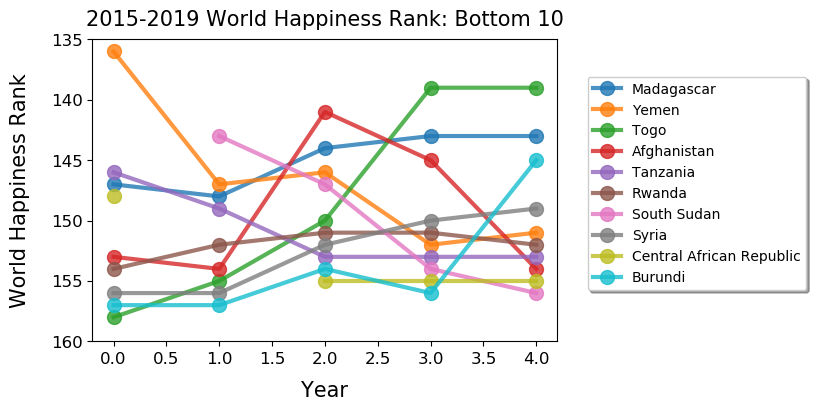

In [218]:
plt.figure(figsize=(6,4), dpi=100)
for c in list(score.tail(10)['Country']):
    plt.plot(getRank(c), label = c, linestyle='-', marker='o', markersize=10, linewidth=3, alpha=0.8)
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.9), shadow=True, ncol=1)
plt.xlabel('Year', fontsize=15, labelpad=10)
plt.ylabel('World Happiness Rank', fontsize=15, labelpad=15)
plt.ylim(160,135)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('2015-2019 World Happiness Rank: Bottom 10', fontsize=15, pad=10)

Almost all countries are in Africa or Midlle East.

What are the factors driving these ranks?

## 2. Among the six key factors, which factor contributes the most to the overall happiness score?

First, look at the distribution of the six key factors. Which one contributes the most? Are there year-to-year changes?

In [177]:
# Extract factor score data from the score file
# 2015
x15 = list(score['Score'])
x25 = list(score['Economy'])
x35 = list(score['Social Support'])
x45 = list(score['Health'])
x55 = list(score['Freedom'])
x65 = list(score['Trust'])
x75 = list(score['Generosity'])
x85 = list(score['Residual'])
# 2016
x16 = list(score['Score.1'])
x26 = list(score['Economy.1'])
x36 = list(score['Social Support.1'])
x46 = list(score['Health.1'])
x56 = list(score['Freedom.1'])
x66 = list(score['Trust.1'])
x76 = list(score['Generosity.1'])
x86 = list(score['Residual.1'])
# 2017
x17 = list(score['Score.2'])
x27 = list(score['Economy.2'])
x37 = list(score['Social Support.2'])
x47 = list(score['Health.2'])
x57 = list(score['Freedom.2'])
x67 = list(score['Trust.2'])
x77 = list(score['Generosity.2'])
x87 = list(score['Residual.2'])
# 2018
x18 = list(score['Score.3'])
x28 = list(score['Economy.3'])
x38 = list(score['Social Support.3'])
x48 = list(score['Health.3'])
x58 = list(score['Freedom.3'])
x68 = list(score['Trust.3'])
x78 = list(score['Generosity.3'])
x88 = list(score['Residual.3'])
# 2019
x19 = list(score['Score.4'])
x29 = list(score['Economy.4'])
x39 = list(score['Social Support.4'])
x49 = list(score['Health.4'])
x59 = list(score['Freedom.4'])
x69 = list(score['Trust.4'])
x79 = list(score['Generosity.4'])
x89 = list(score['Residual.4'])

Text(0.5,1,'2019')

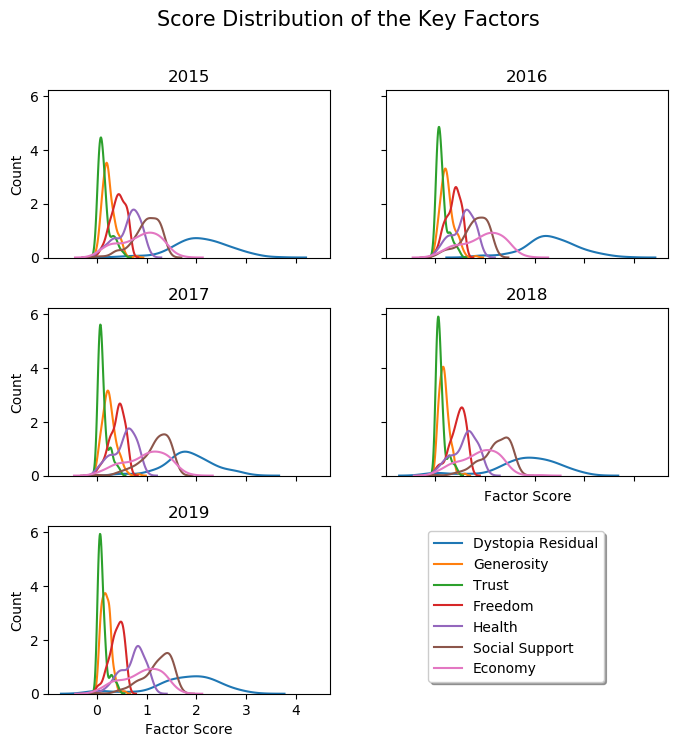

In [294]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(8,8), dpi=100)
fig.subplots_adjust(hspace = 0.3)
axs[2][1].set_visible(False)
fig.suptitle('Score Distribution of the Key Factors', fontsize=15)
#sns.distplot(x1, hist=True, hist_kws={'edgecolor':'black'})
sns.distplot(x85, hist=False, hist_kws={'edgecolor':'black'}, label='Dystopia Residual', ax=axs[0,0])
sns.distplot(x75, hist=False, hist_kws={'edgecolor':'black'}, label='Generosity', ax=axs[0,0])
sns.distplot(x65, hist=False, hist_kws={'edgecolor':'black'}, label='Trust', ax=axs[0,0])
sns.distplot(x55, hist=False, hist_kws={'edgecolor':'black'}, label='Freedom', ax=axs[0,0])
sns.distplot(x45, hist=False, hist_kws={'edgecolor':'black'}, label='Health', ax=axs[0,0])
sns.distplot(x35, hist=False, hist_kws={'edgecolor':'black'}, label='Social Support', ax=axs[0,0])
sns.distplot(x25, hist=False, hist_kws={'edgecolor':'black'}, label='Economy', ax=axs[0,0])
axs[0,0].legend(loc='lower center', bbox_to_anchor=(1.66, -2.57), shadow=True, ncol=1, fontsize=10)
axs[0,0].tick_params(axis='both', which='major')
#axs[0,0].set_xlabel('Factor Score')
axs[0,0].set_ylabel('Count')
axs[0,0].set_title('2015')

sns.distplot(x86, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[0,1])
sns.distplot(x76, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[0,1])
sns.distplot(x66, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[0,1])
sns.distplot(x56, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[0,1])
sns.distplot(x46, hist=False, hist_kws={'edgecolor':'black'}, ax=axs[0,1])
sns.distplot(x36, hist=False, hist_kws={'edgecolor':'black'}, ax=axs[0,1])
sns.distplot(x26, hist=False, hist_kws={'edgecolor':'black'}, ax=axs[0,1])
axs[0,1].tick_params(axis='both', which='major')
#axs[0,1].set_xlabel('Factor Score')
#axs[0,1].set_ylabel('Count')
axs[0,1].set_title('2016')

sns.distplot(x87, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[1,0])
sns.distplot(x77, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[1,0])
sns.distplot(x67, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[1,0])
sns.distplot(x57, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[1,0])
sns.distplot(x47, hist=False, hist_kws={'edgecolor':'black'}, ax=axs[1,0])
sns.distplot(x37, hist=False, hist_kws={'edgecolor':'black'}, ax=axs[1,0])
sns.distplot(x27, hist=False, hist_kws={'edgecolor':'black'}, ax=axs[1,0])
axs[1,0].tick_params(axis='both', which='major')
#axs[1,0].set_xlabel('Factor Score')
axs[1,0].set_ylabel('Count')
axs[1,0].set_title('2017')

sns.distplot(x88, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[1,1])
sns.distplot(x78, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[1,1])
sns.distplot(x68, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[1,1])
sns.distplot(x58, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[1,1])
sns.distplot(x48, hist=False, hist_kws={'edgecolor':'black'}, ax=axs[1,1])
sns.distplot(x38, hist=False, hist_kws={'edgecolor':'black'}, ax=axs[1,1])
sns.distplot(x28, hist=False, hist_kws={'edgecolor':'black'}, ax=axs[1,1])
axs[1,1].tick_params(axis='both', which='major')
axs[1,1].set_xlabel('Factor Score', labelpad=10)
#axs[1,1].set_ylabel('Count')
axs[1,1].set_title('2018')

sns.distplot(x89, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[2,0])
sns.distplot(x79, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[2,0])
sns.distplot(x69, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[2,0])
sns.distplot(x59, hist=False, hist_kws={'edgecolor':'black'},  ax=axs[2,0])
sns.distplot(x49, hist=False, hist_kws={'edgecolor':'black'}, ax=axs[2,0])
sns.distplot(x39, hist=False, hist_kws={'edgecolor':'black'}, ax=axs[2,0])
sns.distplot(x29, hist=False, hist_kws={'edgecolor':'black'}, ax=axs[2,0])
axs[2,0].tick_params(axis='both', which='major')
axs[2,0].set_xlabel('Factor Score')
axs[2,0].set_ylabel('Count')
axs[2,0].set_title('2019')

The distribution of different key factors does not vary a lot throughout the years. Dystopia Residual has highest scores, which is expected based on its concept (https://www.kaggle.com/unsdsn/world-happiness). Among the other six key factors, Social Support and Economy seem to matter the most, while Trust (Perception of Government Corruption) and Generosity are among the least contributing factors.
Let's take a closer look at the comparison of top 10 and bottom 10 countries, and identify which factors play the most important role in separating them. Since the distribution and relative importance of the key factors did not vary much from year to year, we'll only look at year 2015 as an example.

In [287]:
def getTop(top15):
    res = list(reversed(list(top15['Score'])))
    gen = list(reversed(list(top15['Economy']+top15['Support']+top15['Health']+top15['Freedom']+top15['Corruption']+top15['Generosity'])))
    tru = list(reversed(list(top15['Economy']+top15['Support']+top15['Health']+top15['Freedom']+top15['Corruption'])))
    fre = list(reversed(list(top15['Economy']+top15['Support']+top15['Health']+top15['Freedom'])))
    hea = list(reversed(list(top15['Economy']+top15['Support']+top15['Health'])))
    soc = list(reversed(list(top15['Economy']+top15['Support'])))
    eco = list(reversed(list(top15['Economy'])))
    return res, gen, tru, fre, hea, soc, eco

Text(0.5,0,'Contribution to Total Score (%)')

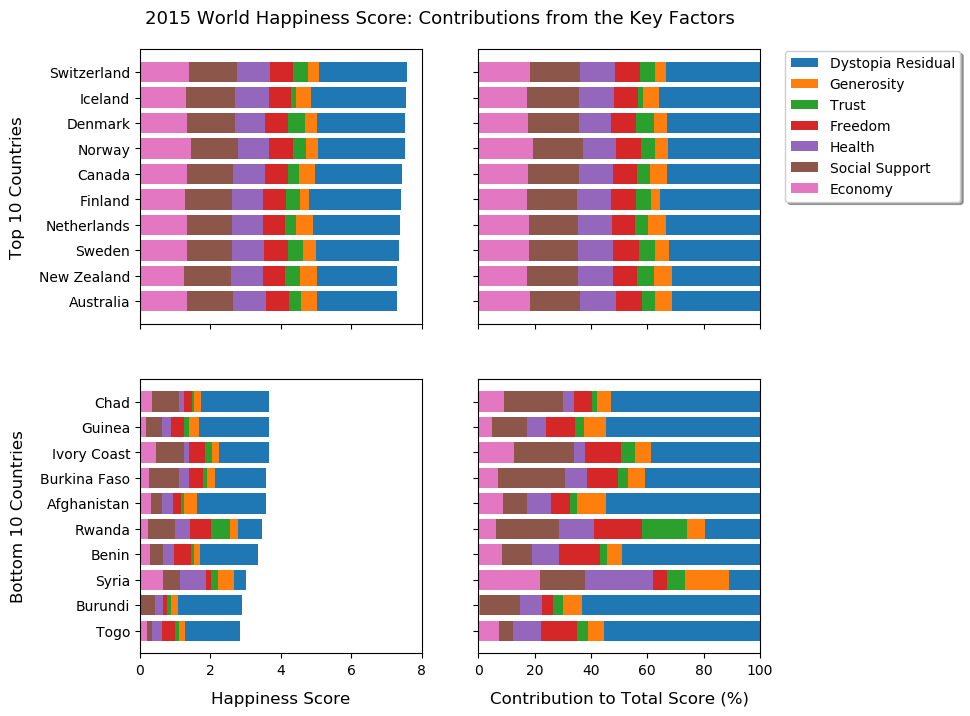

In [528]:
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(8,8), dpi=100)
#fig, axs = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(8,8), dpi=100)
#fig.subplots_adjust(hspace = 0.3)
fig.suptitle('2015 World Happiness Score: Contributions from the Key Factors', fontsize=13, y=0.93)

res, gen, tru, fre, hea, soc, eco = getTop(whr15.head(10))
label = ['Dystopia Residual', 'Generosity', 'Trust', 'Freedom', 'Health', 'Social Support', 'Economy']
for i, f in enumerate([res, gen, tru, fre, hea, soc, eco]):
    axs[0,0].barh(list(reversed(list(whr15.head(10)['Country']))), f, label=label[i])
#axs[0,0].legend(loc='upper center', bbox_to_anchor=(1.25, 1.02), shadow=True, ncol=1, fontsize=10)
#axs[0,0].set_xlabel('Score', fontsize=15, labelpad=10)
axs[0,0].set_ylabel('Top 10 Countries', fontsize=12, labelpad=10)
axs[0,0].tick_params(axis='both', which='major', labelsize=10)
axs[0,0].set_xlim(0,8)

for i, f in enumerate([res, gen, tru, fre, hea, soc, eco]):
    axs[0,1].barh(list(reversed(list(whr15.head(10)['Country']))), np.multiply(100, np.divide(f,res)), label=label[i])
axs[0,1].legend(loc='upper center', bbox_to_anchor=(1.4, 1.02), shadow=True, ncol=1, fontsize=10)
#axs[0,1].set_xlabel('Percentage Contribution to Total Score (%)', fontsize=12, labelpad=10)
#axs[0,1].set_ylabel('Countries', fontsize=15, labelpad=10)
#axs[0,1].tick_params(axis='both', which='major', labelsize=10)
#plt.title('2015 World Happiness Score: Top 10', fontsize=15, pad=10)
axs[0,1].set_xlim(0,100)

res, gen, tru, fre, hea, soc, eco = getTop(whr15.tail(10))
for i, f in enumerate([res, gen, tru, fre, hea, soc, eco]):
    axs[1,0].barh(list(reversed(list(whr15.tail(10)['Country']))), f, label=label[i])
#axs[0,0].legend(loc='upper center', bbox_to_anchor=(1.25, 1.02), shadow=True, ncol=1, fontsize=10)
axs[1,0].set_xlabel('Happiness Score', fontsize=12, labelpad=10)
axs[1,0].set_ylabel('Bottom 10 Countries', fontsize=12, labelpad=10)
axs[1,0].tick_params(axis='both', which='major', labelsize=10)
#fig.suptitle('2015 World Happiness Score', fontsize=15)
#axs[1,0].set_xlim(0,8)

for i, f in enumerate([res, gen, tru, fre, hea, soc, eco]):
    axs[1,1].barh(list(reversed(list(whr15.tail(10)['Country']))), np.multiply(100, np.divide(f,res)), label=label[i])
#axs[1,1].legend(loc='upper center', bbox_to_anchor=(1.4, 1.02), shadow=True, ncol=1, fontsize=10)
axs[1,1].set_xlabel('Contribution to Total Score (%)', fontsize=12, labelpad=10)
#axs[1,1].set_ylabel('Countries', fontsize=15, labelpad=10)
#axs[1,1].tick_params(axis='both', which='major', labelsize=10)
#plt.title('2015 World Happiness Score: Top 10', fontsize=15, pad=10)
#axs[1,1].set_xlim(0,100)

Compared to the Top 10 countries, each factor is much smaller for the bottom 10 countries. Large discrepancies are seen especially in the Economy factor, suggesting that Economy (GDP per Capita) is the most important factor that results in the overall Happiness Score. Also, in terms of relative contribution, compared to the top 10 countries, the overall Happiness Scores of some bottom 10 countries seem to rely more on factors such as Social Support.

## 3. Case study: How does the happiness score of US and China change over time and what factors are driving these changes? What can we learn about it?

We've been focusing on the top and bottom countries based on their Happiness Scores. Let's now investigate countries of my interests: US and China. 
What are their Happiness Ranks? 
Are there any trends during 2015-2019? 
How are they different in terms of the contribution of the key factors?

In [451]:
def getYear(country):
    x = np.empty(7)
    for i, c in enumerate([whr15, whr16, whr17, whr18, whr19]):
        con = np.asarray(c[c['Country'] == country][['Economy','Support','Health','Freedom','Corruption','Generosity','Score']])[0]
        x = np.vstack([x, con])
    return x[1:].T # factors are in rows, years in columns

def getFac(country):
    x = getYear(country)
    res = x[6]    
    gen = np.sum(x[0:6],axis=0)
    tru = np.sum(x[0:5],axis=0)
    fre = np.sum(x[0:4],axis=0)
    hea = np.sum(x[0:3],axis=0)
    soc = np.sum(x[0:2],axis=0)
    eco = np.sum(x[0:1],axis=0)
    return res, gen, tru, fre, hea, soc, eco

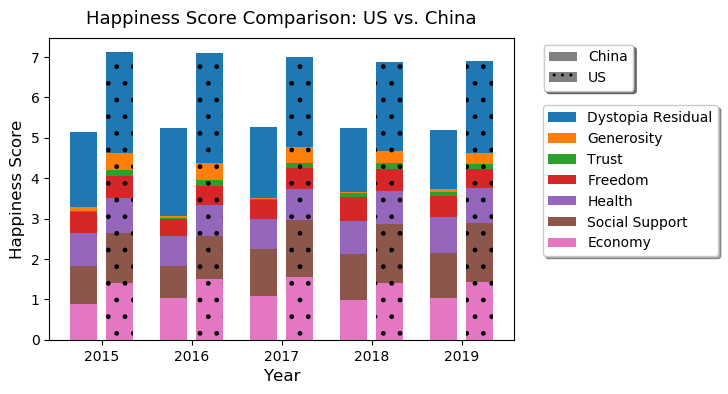

In [527]:
plt.figure(figsize=(6,4), dpi=100)
year = ['2015','2016','2017','2018','2019']
label = ['Dystopia Residual', 'Generosity', 'Trust', 'Freedom', 'Health', 'Social Support', 'Economy']
width = 0.3

res, gen, tru, fre, hea, soc, eco = getFac('China')
for i, f in enumerate([res, gen, tru, fre, hea, soc, eco]):
    x = np.arange(5)
    plt.bar(x-0.2, f, width, label=label[i])
    
col = plt.rcParams['axes.prop_cycle'].by_key()['color']    
res, gen, tru, fre, hea, soc, eco = getFac('United States')
for i, f in enumerate([res, gen, tru, fre, hea, soc, eco]):
    x = np.arange(5)
    plt.bar(x+0.2, f, width, color=col[i], hatch='.')
    
plt.title('Happiness Score Comparison: US vs. China', fontsize=13, pad=10)
plt.xticks(x,year)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
legend1= plt.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)
p = [Patch(facecolor='gray', label='China'), Patch(facecolor='gray', hatch='..', label='US')]
legend2 = plt.legend(handles=p, loc='upper center', bbox_to_anchor=(1.16, 1), shadow=True, ncol=1)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

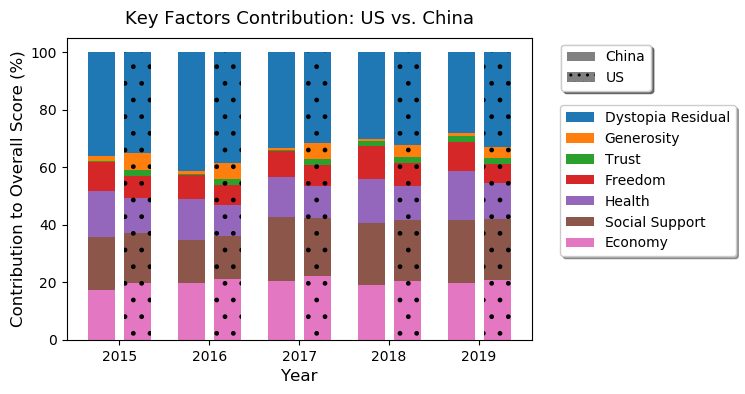

In [530]:
plt.figure(figsize=(6,4), dpi=100)
year = ['2015','2016','2017','2018','2019']
label = ['Dystopia Residual', 'Generosity', 'Trust', 'Freedom', 'Health', 'Social Support', 'Economy']
width = 0.3

res, gen, tru, fre, hea, soc, eco = getFac('China')
for i, f in enumerate([res, gen, tru, fre, hea, soc, eco]):
    x = np.arange(5)
    plt.bar(x-0.2, np.multiply(100, np.divide(f,res)), width, label=label[i]) 
    
col = plt.rcParams['axes.prop_cycle'].by_key()['color']    
res, gen, tru, fre, hea, soc, eco = getFac('United States')
for i, f in enumerate([res, gen, tru, fre, hea, soc, eco]):
    x = np.arange(5)
    plt.bar(x+0.2, np.multiply(100, np.divide(f,res)), width, color=col[i], hatch='.')
    
plt.title('Key Factors Contribution: US vs. China', fontsize=13, pad=10)
plt.xticks(x,year)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Contribution to Overall Score (%)', fontsize=12)
legend1= plt.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)
p = [Patch(facecolor='gray', label='China'), Patch(facecolor='gray', hatch='..', label='US')]
legend2 = plt.legend(handles=p, loc='upper center', bbox_to_anchor=(1.16, 1), shadow=True, ncol=1)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

Both the US and China show relatively stable overall scores during 2015-2019. Differences in Economy and Social Support, which are shown previously the most important key factors contributing to the overall Happiness Score, are the most prominent difference in the comparison of the US and China. Health and Freedom are comparable between the two countries. Notably, China's Trust and Generosity Scores are much lower compare to the US, suggesting room to improve in these two aspects for China. The percentage contribution of Economy and Social Support are comparable between the two countries, supporting our conclusion that these two are the most important factors. Less contribution from Generosity and Trust in China compared to the US, is associated with the relatively larger contribution from Freedom and Health in China, even though their absolute scores are smililar to those of the US.

## 4. Are any of the key factors correlated?

Plot the correlation between the 6 key factors to check if any of them are related. First reorgnize the data to a new .csv file, where factor scores are extracted for all countries, each saved in a column. Add the year information is added as a separate column. 

In [533]:
# load data
forcor = pd.read_csv('./World Happiness Report - Kaggle/forcor.csv')

In [535]:
forcor.head(5)

,Economy,Social Support,Health,Freedom,Trust,Generosity,Year
0,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015.0
1,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015.0
2,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015.0
3,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015.0
4,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015.0


First, plot scatter plots colorcoded by year. Are there any year-to-year variations?

Text(0.5,1.04,'Pairwise Relationships between Key Factors')

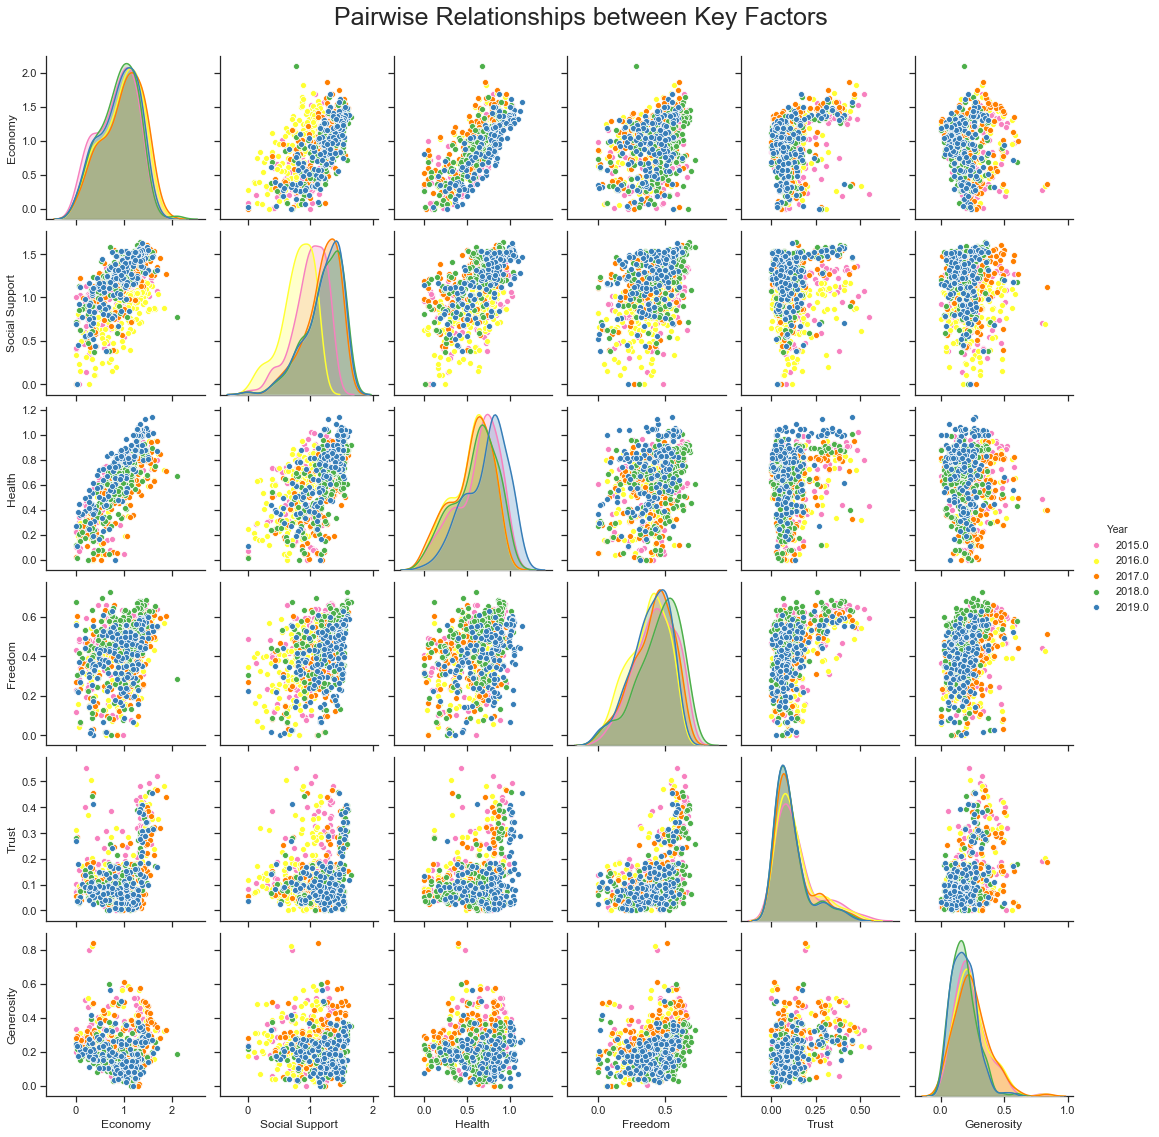

In [582]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(forcor, hue="Year", palette="Set1_r")
g.fig.suptitle('Pairwise Relationships between Key Factors', y=1.04, fontsize=25) 

No significant variations are found between years. There may be significant correlations between Economy and Social Support, and Economy and Health. Next, generate the correlation matrix to check for sure.

Text(0.5,0.95,'Correlation Matrix of Key Factors')

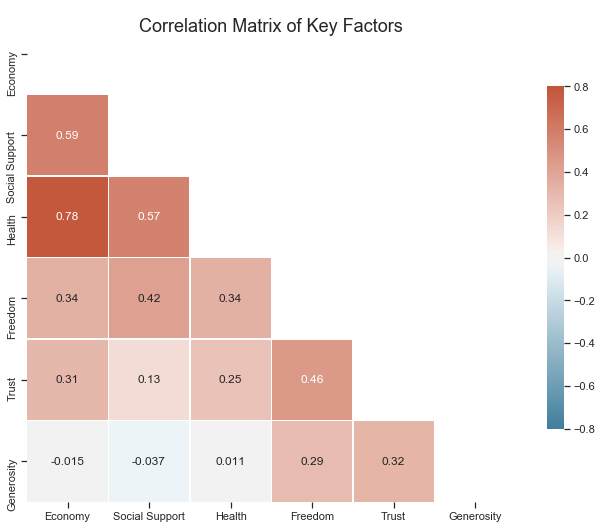

In [588]:
# Remove 'Year' from the dataset
fcor = forcor[['Economy', 'Social Support', 'Health',  'Freedom', 'Trust', 'Generosity']]

# Compute the correlation matrix
corr = fcor.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, annot = True, vmin=-0.8, vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})
plt.title('Correlation Matrix of Key Factors', y=0.95, fontsize=18)

Good correlations are found between Health and Economy, which makes sense based on Hans Rosling's talk: https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen.
Other factors do not show strong relationships. 